<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/avocado_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd

In [63]:
import warnings

In [64]:
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('/content/sample_data/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [88]:
df = df.drop('Unnamed: 0', axis=1)

In [89]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [90]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [91]:
df['Date'] = pd.to_datetime(df['Date'])

In [92]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [93]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [94]:
df = pd.get_dummies(df, columns=['type', 'region'])

In [95]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop('Date', axis=1)

In [98]:
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
regr = RandomForestRegressor()

In [103]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [105]:
y_pred = regr.predict(X_test)

In [106]:
y_pred

array([0.7841, 1.2969, 0.8863, ..., 1.1577, 1.0453, 1.5133])

In [107]:
regr.score(X_test, y_test)

0.9010161513191138

In [108]:
cyberpunk = df.head(1)

In [112]:
cyberpunk = cyberpunk.drop('AveragePrice', axis=1)

In [113]:
cyberpunk['year'] = 2077
cyberpunk.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_conventional,...,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2077,1,...,0,0,0,0,0,0,0,0,12,27


In [114]:
pred = regr.predict(cyberpunk)

In [115]:
pred

array([1.3963])

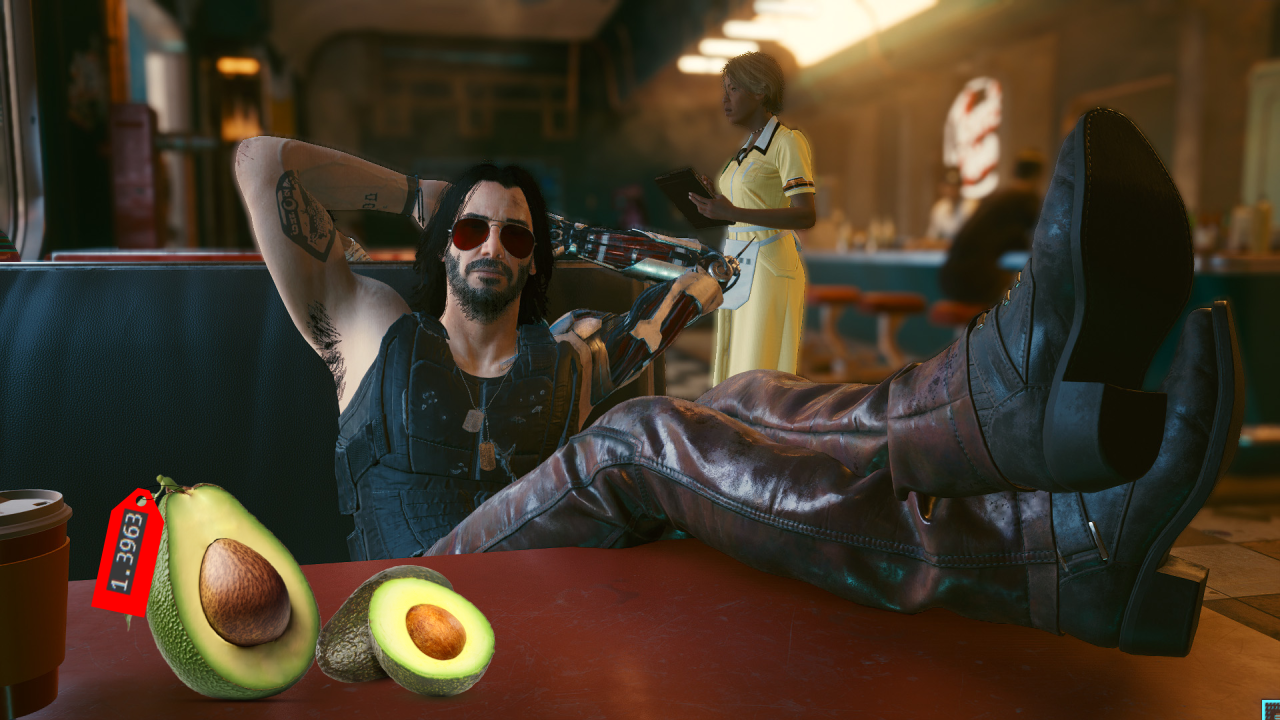